# OpenML in Python 
OpenML is an online collaboration platform for machine learning: 

* Find or share interesting, well-documented datasets
* Define research / modelling goals (tasks)
* Explore large amounts of machine learning algorithms, with APIs in Java, R, Python
* Log and share reproducible experiments, models, results 
* Works seamlessly with scikit-learn and other libraries
* Large scale benchmarking, compare to state of the art

# Installation

* `pip install openml`

## Authentication

* Create an OpenML account (free) on http://www.openml.org. 
* After logging in, open your account page (avatar on the top right)
* Open 'Account Settings', then 'API authentication' to find your API key.

There are two ways to authenticate:  

* Create a plain text file `~/.openml/config` with the line 'apikey=MYKEY', replacing MYKEY with your API key.
* Run the code below, replacing 'YOURKEY' with your API key.

In [3]:
# Uncomment and set your OpenML key. Don't share your key with others.
import openml as oml
#oml.config.apikey = 'YOURKEY' 

# It all starts with data
Explore thousands of datasets, or share your own

### List datasets

In [4]:
import openml as oml
openml_list = oml.datasets.list_datasets() # Returns a dict

# Show a nice table with some key data properties
import pandas as pd
datalist = pd.DataFrame.from_dict(openml_list, orient='index') 
datalist = datalist[[
    'did','name','NumberOfInstances',
    'NumberOfFeatures','NumberOfClasses'
]]
print("First 10 of %s datasets..." % len(datalist))
datalist.head(n=10)

First 10 of 2519 datasets...


,did,name,NumberOfInstances,NumberOfFeatures,NumberOfClasses
2,2,anneal,898,39,5
3,3,kr-vs-kp,3196,37,2
4,4,labor,57,17,2
5,5,arrhythmia,452,280,13
6,6,letter,20000,17,26
7,7,audiology,226,70,24
8,8,liver-disorders,345,7,16
9,9,autos,205,26,6
10,10,lymph,148,19,4
11,11,balance-scale,625,5,3


### Exercise
- Find datasets with more than 10000 examples
- Find a dataset called 'eeg_eye_state'
- Find all datasets with more than 50 classes

In [5]:
datalist[datalist.NumberOfInstances>10000
        ].sort_values(['NumberOfInstances']).head(n=20)

,did,name,NumberOfInstances,NumberOfFeatures,NumberOfClasses
23515,23515,sulfur,10081,7,-1
981,981,kdd_internet_usage,10108,69,2
372,372,internet_usage,10108,72,46
1536,1536,volcanoes-b6,10130,4,5
4562,4562,InternetUsage,10168,72,-1
1531,1531,volcanoes-b1,10176,4,5
1534,1534,volcanoes-b4,10190,4,5
1459,1459,artificial-characters,10218,8,10
1478,1478,har,10299,562,6
1533,1533,volcanoes-b3,10386,4,5


In [6]:
datalist.query('name == "eeg-eye-state"')

,did,name,NumberOfInstances,NumberOfFeatures,NumberOfClasses
1471,1471,eeg-eye-state,14980,15,2


In [7]:
datalist.query('NumberOfClasses > 50')

,did,name,NumberOfInstances,NumberOfFeatures,NumberOfClasses
190,190,mbagrade,61,3,57
512,512,balloon,2001,3,365
1092,1092,Crash,352,14,307
1414,1414,Kaggle_bike_sharing_demand_challange,10886,12,822
1491,1491,one-hundred-plants-margin,1600,65,100
1492,1492,one-hundred-plants-shape,1600,65,100
1493,1493,one-hundred-plants-texture,1599,65,100
4546,4546,Plants,44940,16,57
4552,4552,BachChoralHarmony,5665,17,102
40601,40601,RAM_price,333,3,219


## Download datasets
This is done based on the dataset ID ('did').

In [8]:
dataset = oml.datasets.get_dataset(1471)

# Print a summary
print("This is dataset '%s', the target feature is '%s'" % 
      (dataset.name, dataset.default_target_attribute))
print("URL: %s" % dataset.url)
print(dataset.description[:500])

This is dataset 'eeg-eye-state', the target feature is 'Class'
URL: https://www.openml.org/data/v1/download/1587924/eeg-eye-state.arff
**Author**: Oliver Roesler  
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/EEG+Eye+State), Baden-Wuerttemberg, Cooperative State University (DHBW), Stuttgart, Germany  
**Please cite**: [UCI](https://archive.ics.uci.edu/ml/citation_policy.html)  

All data is from one continuous EEG measurement with the Emotiv EEG Neuroheadset. The duration of the measurement was 117 seconds. The eye state was detected via a camera during the EEG measurement and added later manually to the file after


Get the actual data.  
Returned as numpy array, with meta-info (e.g. target feature, feature names,...)

In [9]:
X, y, attribute_names = dataset.get_data(
    target=dataset.default_target_attribute,
    return_attribute_names=True,
)
eeg = pd.DataFrame(X, columns=attribute_names)
eeg['class'] = y
print(eeg[:10])

            V1           V2           V3           V4           V5  \
0  4329.229980  4009.229980  4289.229980  4148.209961  4350.259766   
1  4324.620117  4004.620117  4293.850098  4148.720215  4342.049805   
2  4327.689941  4006.669922  4295.379883  4156.410156  4336.919922   
3  4328.720215  4011.790039  4296.410156  4155.899902  4343.589844   
4  4326.149902  4011.790039  4292.310059  4151.279785  4347.689941   
5  4321.029785  4004.620117  4284.100098  4153.330078  4345.640137   
6  4319.490234  4001.030029  4280.509766  4151.790039  4343.589844   
7  4325.640137  4006.669922  4278.459961  4143.080078  4344.100098   
8  4326.149902  4010.770020  4276.410156  4139.490234  4345.129883   
9  4326.149902  4011.280029  4276.919922  4142.049805  4344.100098   

            V6           V7           V8           V9          V10  \
0  4586.149902  4096.919922  4641.029785  4222.049805  4238.459961   
1  4586.669922  4097.439941  4638.970215  4210.770020  4226.669922   
2  4583.589844  409

### Exercise
- Explore the data visually

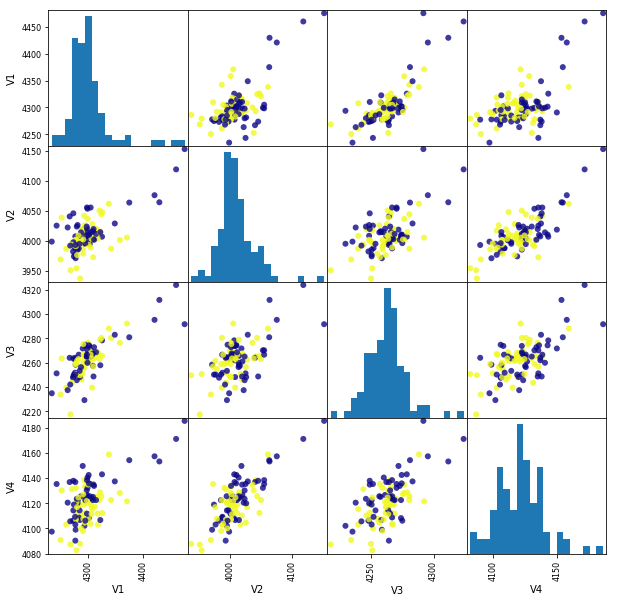

In [10]:
%matplotlib inline
eegs = eeg.sample(n=1000)
_ = pd.plotting.scatter_matrix(
    eegs.iloc[:100,:4], 
    c=eegs[:100]['class'], 
    figsize=(10, 10), 
    marker='o', 
    hist_kwds={'bins': 20}, 
    alpha=.8, 
    cmap='plasma'
)

## Train machine learning models
Train a scikit-learn model on the data manually

In [11]:
from sklearn import neighbors

dataset = oml.datasets.get_dataset(1471)
X, y = dataset.get_data(target=dataset.default_target_attribute)
clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

You can also ask for meta-data to automatically preprocess the data
- e.g. categorical features -> do feature encoding

In [12]:
from sklearn import preprocessing
dataset = oml.datasets.get_dataset(10)
X, y, categorical = dataset.get_data(
    target=dataset.default_target_attribute,
    return_categorical_indicator=True,
)
print("Categorical features: %s" % categorical)
enc = preprocessing.OneHotEncoder(categorical_features=categorical)
X = enc.fit_transform(X)
clf.fit(X, y)

Categorical features: [True, True, True, True, True, True, True, True, False, False, True, True, True, True, True, True, True, False]


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

# Tasks: set your own goals
and invite others to work on the same problem  
Note: tasks are typically created in the web interface

## Listing tasks

In [13]:
task_list = oml.tasks.list_tasks(size=5000) # Get first 5000 tasks

mytasks = pd.DataFrame.from_dict(task_list, orient='index')
mytasks = mytasks[['tid','did','name','task_type','estimation_procedure','evaluation_measures']]
print("First 5 of %s tasks:" % len(mytasks))
mytasks.head()

First 5 of 5000 tasks:


,tid,did,name,task_type,estimation_procedure,evaluation_measures
2,2,2,anneal,Supervised Classification,10-fold Crossvalidation,predictive_accuracy
3,3,3,kr-vs-kp,Supervised Classification,10-fold Crossvalidation,NaN
4,4,4,labor,Supervised Classification,10-fold Crossvalidation,predictive_accuracy
5,5,5,arrhythmia,Supervised Classification,10-fold Crossvalidation,predictive_accuracy
6,6,6,letter,Supervised Classification,10-fold Crossvalidation,NaN


### Exercise
Search for the tasks on the 'eeg-eye-state' dataset

In [14]:
mytasks.query('name=="eeg-eye-state"')

,tid,did,name,task_type,estimation_procedure,evaluation_measures
9983,9983,1471,eeg-eye-state,Supervised Classification,10-fold Crossvalidation,NaN
14951,14951,1471,eeg-eye-state,Supervised Classification,10-fold Crossvalidation,NaN


## Download tasks

In [15]:
from pprint import pprint
task = oml.tasks.get_task(14951)
pprint(vars(task))

{'class_labels': ['1', '2'],
 'cost_matrix': None,
 'dataset_id': 1471,
 'estimation_parameters': {'number_folds': '10',
                           'number_repeats': '1',
                           'percentage': '',
                           'stratified_sampling': 'true'},
 'estimation_procedure': {'data_splits_url': 'https://www.openml.org/api_splits/get/14951/Task_14951_splits.arff',
                          'parameters': {'number_folds': '10',
                                         'number_repeats': '1',
                                         'percentage': '',
                                         'stratified_sampling': 'true'},
                          'type': 'crossvalidation'},
 'evaluation_measure': None,
 'split': None,
 'target_name': 'Class',
 'task_id': 14951,
 'task_type': 'Supervised Classification',
 'task_type_id': 1}


# Runs: Easily explore models by running them on tasks
We can run (many) scikit-learn algorithms on (many) OpenML tasks.

In [16]:
from sklearn import ensemble, tree

# Get a task
task = oml.tasks.get_task(14951)

# Build any classifier or pipeline
clf = tree.ExtraTreeClassifier()

# Create a flow
flow = oml.flows.sklearn_to_flow(clf)

# Run the flow 
run = oml.runs.run_flow_on_task(task, flow)

Share the run on the OpenML server

In [17]:
myrun = run.publish()
print("Uploaded to http://www.openml.org/r/" + str(myrun.run_id))

Uploaded to http://www.openml.org/r/9204035


### It also works with pipelines
When you need to handle 'dirty' data, build pipelines to model then automatically

In [18]:
from sklearn import pipeline, ensemble, preprocessing
from openml import tasks,runs, datasets
task = tasks.get_task(59)
pipe = pipeline.Pipeline(steps=[
            ('Imputer', preprocessing.Imputer(strategy='median')),
            ('OneHotEncoder', preprocessing.OneHotEncoder(sparse=False, handle_unknown='ignore')),
            ('Classifier', ensemble.RandomForestClassifier())
           ])
flow = oml.flows.sklearn_to_flow(pipe)

run = oml.runs.run_flow_on_task(task, flow)
myrun = run.publish()
print("Uploaded to http://www.openml.org/r/" + str(myrun.run_id))

Uploaded to http://www.openml.org/r/9204036


## Download previous results
You can download all your results anytime, as well as everybody else's  
List runs by uploader, flow, task, tag, id, ...

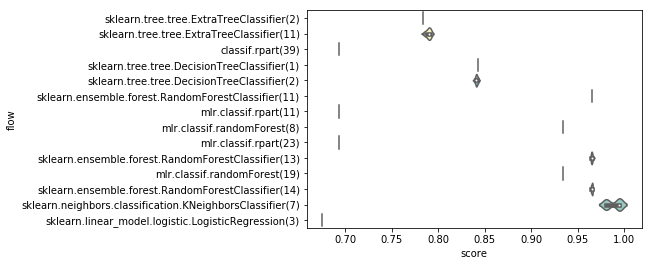

In [19]:
import seaborn as sns
import pandas as pd

# Get the list of runs for task 14951
myruns = oml.runs.list_runs(task=[14951], size=100)

# Download the tasks and plot the scores
scores = []
for id, _ in myruns.items():
    run = oml.runs.get_run(id)
    scores.append({"flow":run.flow_name, "score":run.evaluations['area_under_roc_curve']})
    
sns.violinplot(x="score", y="flow", data=pd.DataFrame(scores), scale="width", palette="Set3");

## A Challenge
Try to build the best possible models on several OpenML tasks, and compare your results with the rest of the class, and learn from them. Some tasks you could try (or browse openml.org):

* EEG eye state: data_id:[1471](http://www.openml.org/d/1471), task_id:[14951](http://www.openml.org/t/14951)
* Volcanoes on Venus: data_id:[1527](http://www.openml.org/d/1527), task_id:[10103](http://www.openml.org/t/10103)
* Walking activity: data_id:[1509](http://www.openml.org/d/1509), task_id: [9945](http://www.openml.org/t/9945), 150k instances
* Covertype (Satellite): data_id:[150](http://www.openml.org/d/150), task_id: [218](http://www.openml.org/t/218). 500k instances
* Higgs (Physics): data_id:[23512](http://www.openml.org/d/23512), task_id:[52950](http://www.openml.org/t/52950). 100k instances, missing values

Easy benchmarking:

In [20]:
for task_id in [14951, ]: #  Add further tasks. Disclaimer: they might take some time
    task = oml.tasks.get_task(task_id)
    data = oml.datasets.get_dataset(task.dataset_id)
    clf = neighbors.KNeighborsClassifier(n_neighbors=5)
    flow = oml.flows.sklearn_to_flow(clf)
    
    try:
        run = oml.runs.run_flow_on_task(task, flow)
        myrun = run.publish()
        print("kNN on %s: http://www.openml.org/r/%d" % (data.name, myrun.run_id))
    except oml.exceptions.PyOpenMLError as err:
        print("OpenML: {0}".format(err))

OpenML: Run already exists in server. Run id(s): {9203690}


## More exercises
* Find an interesting dataset on OpenML and create an overview of the best models (e.g. do a violin plot as above)
* If you know an interesting dataset that is not yet on OpenML, upload it.
* On the MAGIC dataset (task 3954), download all results for the RandomForest classifier
* Plot both accuracy and training time against the number of estimators in the random forest
* Download all dataset qualities for the MAGIC dataset

Advanced:
* Get all tasks labeled 'OpenML_CC18'. Download all data qualities for all datasets and all training times for all RandomForest experiments. 
* Build a meta-model that predicts the training time of a RandomForest on an arbitrary dataset.